In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [37]:
#loading data
data_15=pd.read_csv('2015.csv')
data_16=pd.read_csv('2016.csv')
data_17=pd.read_csv('2017.csv')
data_18=pd.read_csv('2018.csv')
data_19=pd.read_csv('2019.csv')

In [38]:
#refining and cleaning data according to the requirement #adding the year column 
data_15.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True) 
data_15.columns = ['Country','Rank','Score','Support',
                'GDP','Health',
                'Freedom','Generosity','Corruption']
data_15['Year'] = 2015 
#refining and cleaning data according to the requirement #adding the year column 
data_16.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            'Dystopia Residual'],axis=1,inplace=True)
data_16.columns = ['Country','Rank','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
data_16['Year'] = 2016
#refining and cleaning data according to the requirement #adding the year column 
data_17.drop(['Whisker.high','Whisker.low',
            'Dystopia.Residual'],axis=1,inplace=True)
data_17.columns = ['Country','Rank','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
data_17['Year'] = 2017
#refining and cleaning data according to the requirement #adding the year column 
data_18.columns = ['Rank','Country','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']
data_18['Year'] = 2018
#refining and cleaning data according to the requirement #adding the year column 
data_19.columns = ['Rank','Country','Score','GDP',
                'Support','Health',
                'Freedom','Generosity','Corruption']

data_19['Year'] = 2019

In [39]:
data_15.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [40]:
data_16.head()

,Country,Rank,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [41]:
data_17.head()

,Country,Rank,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [42]:
data_18.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [43]:
data_19.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [44]:
#defining quantiles and dividing/segmenting the data
tgt = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
tgt_n = [4, 3, 2, 1]


data_15["tgt"] = pd.qcut(data_15['Rank'], len(tgt), labels=tgt)
data_15["tgt_n"] = pd.qcut(data_15['Rank'], len(tgt), labels=tgt_n)

data_16["tgt"] = pd.qcut(data_16['Rank'], len(tgt), labels=tgt)
data_16["tgt_n"] = pd.qcut(data_16['Rank'], len(tgt), labels=tgt_n)

data_17["tgt"] = pd.qcut(data_17['Rank'], len(tgt), labels=tgt)
data_17["tgt_n"] = pd.qcut(data_17['Rank'], len(tgt), labels=tgt_n)

data_18["tgt"] = pd.qcut(data_18['Rank'], len(tgt), labels=tgt)
data_18["tgt_n"] = pd.qcut(data_18['Rank'], len(tgt), labels=tgt_n)

data_19["tgt"] = pd.qcut(data_19['Rank'], len(tgt), labels=tgt)
data_19["tgt_n"] = pd.qcut(data_19['Rank'], len(tgt), labels=tgt_n)

In [49]:
#Appending the data for all the years
data_all = data_15.append([data_16,data_17,data_18,data_19])
#Checking for null values if any
data_all.isnull().sum()

Country       0
Rank          0
Score         0
Support       0
GDP           0
Health        0
Freedom       0
Generosity    0
Corruption    1
Year          0
tgt           0
tgt_n         0
dtype: int64

In [50]:
#Filling the missing values with mean 
data_all.Corruption.fillna((data_all.Corruption.mean()), inplace = True)

In [51]:
data_all.describe()

,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,1.049114,0.945326,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.367244,0.384008,0.248309,0.152880,0.119115,0.127329,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.814217,0.688370,0.440183,0.309768,0.084860,0.067921,2016.000000
50%,79.000000,5.322000,1.109075,1.003340,0.647310,0.431000,0.155219,0.128445,2017.000000
75%,118.000000,6.189500,1.337622,1.237970,0.808000,0.531000,0.246864,0.236907,2018.000000
max,158.000000,7.769000,1.690420,2.096000,1.141000,0.724000,0.838075,0.819710,2019.000000


In [52]:
#defining evaluation function 
eval_tab = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                          })

In [53]:
#calculation of adjusted R square 
def adj_r_sq(r_sq,n,k):
    return r_sq-(k-1)/(n-k)*(1-r_sq)

In [55]:
#Multiple Regression Modelling of the data
train_data_all,test_data_all = train_test_split(data_all,train_size = 0.8,random_state=3)
ind_var = ['GDP','Health','Freedom','Support','Generosity','Corruption']
lin_reg = LinearRegression()

lin_reg.fit(train_data_all[ind_var],train_data_all['Score'])

print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients: {}'.format(lin_reg.coef_))
print('Happiness score = ',np.round(lin_reg.intercept_,4),
      '+',np.round(lin_reg.coef_[0],4),'∗ Support',
      '+',np.round(lin_reg.coef_[1],4),'* GDP', 
      '+',np.round(lin_reg.coef_[2],4),'* Health',
      '+',np.round(lin_reg.coef_[3],4),'* Freedom',
       '+',np.round(lin_reg.coef_[4],4),'* Generosity',
      '+',np.round(lin_reg.coef_[5],4),'* Corrption')

pred_all = lin_reg.predict(test_data_all[ind_var])

Intercept: 2.0977281546454822
Coefficients: [1.11255669 0.96132028 1.38522843 0.78535971 0.28237353 1.24976176]
Happiness score =  2.0977 + 1.1126 ∗ Support + 0.9613 * GDP + 1.3852 * Health + 0.7854 * Freedom + 0.2824 * Generosity + 1.2498 * Corrption


In [61]:
# Calculating Root Mean Square Error, R-Squared and Adjusted R-Squared for both 
# testing and training data, and Cross Validation scores
root_mse = float(format(np.sqrt(metrics.mean_squared_error(
                       test_data_all['Score'],pred_all)),'.3f'))
rtrain = float(format(lin_reg.score(
                        train_data_all[ind_var],
                        train_data_all['Score']),'.3f'))
adj_rtrain = float(format(adj_r_sq(lin_reg.score(
                            train_data_all[ind_var],
                            train_data_all['Score']),
                            train_data_all.shape[0],
                            len(ind_var)),'.3f'))
rtest = float(format(lin_reg.score(
                        test_data_all[ind_var],
                        test_data_all['Score']),'.3f'))
adj_rtest = float(format(adj_r_sq(lin_reg.score(
                            test_data_all[ind_var],
                            test_data_all['Score']),
                            test_data_all.shape[0],
                            len(ind_var)),'.3f'))
cross_val = float(format(cross_val_score(lin_reg,
                    data_all[ind_var],
                    data_all['Score'],cv=5).mean(),'.3f'))
a = eval_tab.shape[0]
eval_tab.loc[a] = ['Multiple Linear Regression','selected features',root_mse,rtrain,adj_rtrain,rtest,adj_rtest,cross_val]

In [62]:
eval_tab

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Multiple Linear Regression,selected features,0.571,0.77,0.768,0.761,0.753,0.753


In [72]:
#Compairing the predictions of regression modelling with actual values
df_comp = pd.DataFrame()
df_comp['Actual Score']=test_data_all['Score']
df_comp['Predictions by Regression Modelling']=pred_all
df_comp['Difference/Error']= df_comp['Actual Score'] - df_comp['Predictions by Regression Modelling'] 
df_comp

,Actual Score,Predictions by Regression Modelling,Difference/Error
53,5.915,6.611160,-0.696160
124,4.377,4.690501,-0.313501
45,5.987,6.319172,-0.332172
48,5.960,6.142310,-0.182310
86,5.227,5.471315,-0.244314
...,...,...,...
136,4.166,4.987606,-0.821606
121,4.419,5.010839,-0.591839
73,5.336,5.532572,-0.196572
127,4.332,5.004489,-0.672489


In [76]:
#summary of regression modelling using statsmodels
import statsmodels.api as sm
indep_var = data_all[[ 'GDP', 'Health', 'Support','Freedom','Generosity','Corruption']]
dep_var = data_all['Score']
indep_var_sm = indep_var = sm.add_constant(indep_var)
model = sm.OLS(dep_var,indep_var_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          4.37e-242
Time:                        13:42:21   Log-Likelihood:                -631.35
No. Observations:                 782   AIC:                             1277.
Df Residuals:                     775   BIC:                             1309.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0829      0.073     28.676      0.000       1.940       2.225
GDP            1.1489      0.079     14.625      0.000       0.995       1.303
Health         1.0039      0.128      7.872      0.000       0.754       1.254
Support        0.7384      0.078      9.477      0.000       0.585       0.891
Freedom        1.4239      0.158      8.990      0.000       1.113       1.735
Generosity     0.3258      0.179      1.819      0.069      -0.026       0.677
Corruption     1.0702      0.181      5.927      0.000       0.716       1.425
==============================================================================
Omnibus:                       17.817   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.733
Skew:                          -0.292   Prob(JB):                     3.15e-05
Kurtosis:                       3.544   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

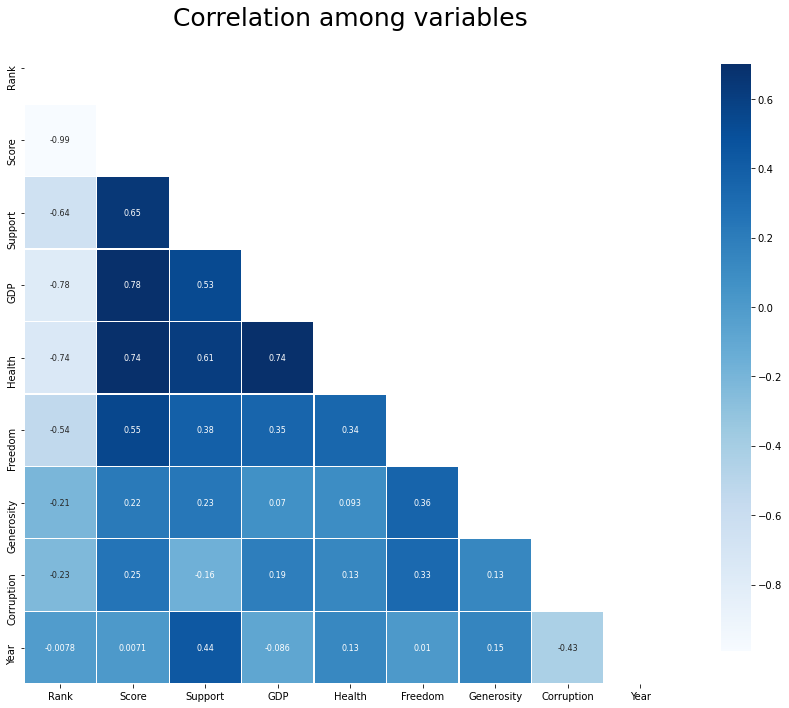

In [82]:
# Correlation among variables
m = np.zeros_like(data_all.corr(), dtype=bool) 
m[np.triu_indices_from(m)] = True 
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation among variables',fontsize=25)
sns.heatmap(data_all.corr(), linewidths=0.25,vmax=0.7,square=True,cmap="Blues",linecolor='w',annot=True,annot_kws={"size":8},mask=m,cbar_kws={"shrink": .9});